In [1]:
import os
os.environ['KERAS_BACKEND'] = 'torch'

In [45]:
from nltk.corpus import movie_reviews

from sklearn.model_selection import train_test_split

import numpy as np

import tensorflow as tf
import torch

import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, TextVectorization, SimpleRNN, LSTM, Bidirectional

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fileids = movie_reviews.fileids()
reviews = [movie_reviews.raw(fileid) for fileid in fileids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

In [4]:
# 1. 백엔드 이름 확인
print(f"현재 Keras 백엔드: {keras.backend.backend()}")

# 2. GPU 사용 가능 여부 확인 (PyTorch 방식)
print(f"GPU 사용 가능: {torch.cuda.is_available()}")

# 3. 간단한 Keras 모델 생성 및 장치 확인
model = keras.Sequential([keras.layers.Dense(10, input_shape=(5,))])
# Keras 텐서가 어떤 장치에 있는지 확인 (PyTorch 백엔드일 경우)
print(f"모델 파라미터가 위치한 장치: {next(model.parameters()).device}")

현재 Keras 백엔드: torch
GPU 사용 가능: True
모델 파라미터가 위치한 장치: cuda:0


c:\Coding\Local\python_text_mining\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
np.random.seed(7)
tf.random.set_seed(7)

In [10]:
max_tokens = 10000
maxlen = 1000
# torch로 keras의 backend를 변경하면서 방식 변경
# tokenizer뿐만 아니라 padding, truncation 까지 이 단계에서 수행
tokenizer = TextVectorization(max_tokens=max_tokens, output_sequence_length=maxlen)
tokenizer.adapt(reviews)
X = tokenizer(reviews)
print([len(doc) for doc in X[:10]])

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [11]:
vocab = tokenizer.get_vocabulary()
word_index = {word: index for index, word in enumerate(vocab)}
print(word_index['the'])
print(word_index['review'])

2
457


In [12]:
label_dict = {'pos':1, 'neg':0}
y = np.array([label_dict[c] for c in categories])
print(set(y))

{np.int64(0), np.int64(1)}


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape)

torch.Size([1600, 1000]) torch.Size([400, 1000])


In [28]:
model = Sequential([
    Embedding(max_tokens, 32, input_length=maxlen),
    Flatten(),
    Dense(1, activation='sigmoid')
])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, maxlen))
model.summary()

c:\Coding\Local\python_text_mining\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 1000, 32)       │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 32000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │        32,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,001 (1.34 MB)

 Trainable params: 352,001 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, verbose=True)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5406 - loss: 0.6959 - val_accuracy: 0.5469 - val_loss: 0.6916
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8508 - loss: 0.5709 - val_accuracy: 0.5531 - val_loss: 0.6923
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9523 - loss: 0.4091 - val_accuracy: 0.5875 - val_loss: 0.6765
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9984 - loss: 0.2371 - val_accuracy: 0.6187 - val_loss: 0.6645
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9992 - loss: 0.1243 - val_accuracy: 0.5969 - val_loss: 0.6572
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0689 - val_accuracy: 0.6062 - val_loss: 0.6560
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0433 - val_accuracy: 0.6250 - val_loss: 0.6548
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0284 - val_accuracy: 0.6313 - val_loss:

In [31]:
print(history.history['val_accuracy'])

[0.546875, 0.5531250238418579, 0.5874999761581421, 0.6187499761581421, 0.596875011920929, 0.606249988079071, 0.625, 0.6312500238418579, 0.625, 0.6312500238418579, 0.6312500238418579, 0.6312500238418579, 0.637499988079071, 0.6343749761581421, 0.637499988079071, 0.643750011920929, 0.643750011920929, 0.643750011920929, 0.640625, 0.643750011920929, 0.643750011920929, 0.6499999761581421, 0.6499999761581421, 0.643750011920929, 0.653124988079071, 0.6468750238418579, 0.6468750238418579, 0.6468750238418579, 0.6468750238418579, 0.6468750238418579]


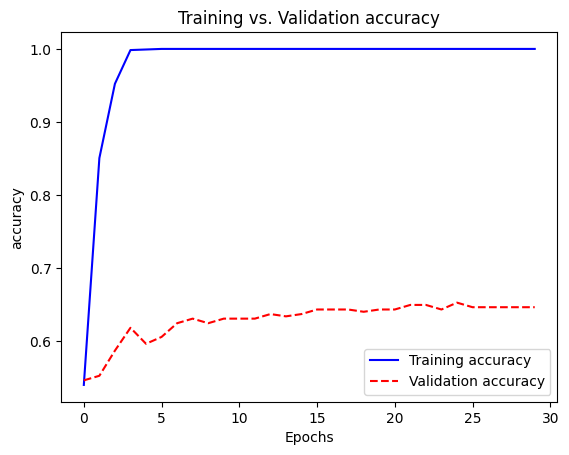

In [32]:
def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training '+metric)
    plt.plot(history.history['val_'+metric], 'r--', label='Validation '+metric)
    plt.title('Training vs. Validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

plot_results(history, 'accuracy')

In [33]:
score = model.evaluate(X_test, y_test)
print(f'{score[1]:.3f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6575 - loss: 0.6713
0.658


In [36]:
model = Sequential([
    Embedding(max_tokens, 32),
    SimpleRNN(32),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.build(input_shape=(None, maxlen))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 1000, 32)       │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323,169 (1.23 MB)

 Trainable params: 323,169 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=True)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 450ms/step - accuracy: 0.5695 - loss: 0.6445 - val_accuracy: 0.5094 - val_loss: 0.6936
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 428ms/step - accuracy: 0.5445 - loss: 0.6380 - val_accuracy: 0.5063 - val_loss: 0.6982
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 430ms/step - accuracy: 0.5727 - loss: 0.6322 - val_accuracy: 0.5031 - val_loss: 0.7004
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 443ms/step - accuracy: 0.5742 - loss: 0.6290 - val_accuracy: 0.4969 - val_loss: 0.7085
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 442ms/step - accuracy: 0.5570 - loss: 0.6334 - val_accuracy: 0.5063 - val_loss: 0.6964
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 430ms/step - accuracy: 0.5484 - loss: 0.6317 - val_accuracy: 0.5031 - val_loss: 0.7021
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 442ms/step - accuracy: 0.5672 - loss: 0.6258 - val_accuracy: 0.5031 - val_loss: 0.7065
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 443ms/step - accuracy: 0.5703 - loss: 0.6232 - val_accu

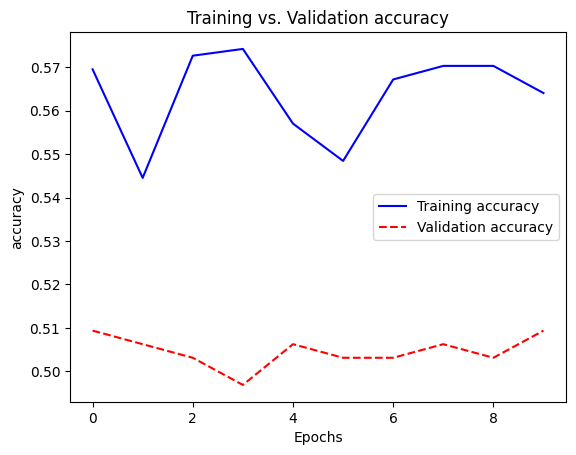

In [40]:
plot_results(history, 'accuracy')

In [41]:
score = model.evaluate(X_test, y_test)
print(f'{score[1]:.3f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 230ms/step - accuracy: 0.4850 - loss: 0.7146
0.485


In [46]:
model = Sequential([
    Embedding(max_tokens, 64),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.build(input_shape=(None, maxlen))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 1000, 64)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 714,369 (2.73 MB)

 Trainable params: 714,369 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=True)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.5172 - loss: 0.6924 - val_accuracy: 0.4938 - val_loss: 0.6917
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6313 - loss: 0.6578 - val_accuracy: 0.5344 - val_loss: 0.6939
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.8375 - loss: 0.4624 - val_accuracy: 0.5781 - val_loss: 0.8205
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.9492 - loss: 0.1385 - val_accuracy: 0.5781 - val_loss: 1.2852
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.9914 - loss: 0.0312 - val_accuracy: 0.5813 - val_loss: 1.5983
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.5625 - val_loss: 1.8814
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 1.0000 - loss: 8.0606e-04 - val_accuracy: 0.5625 - val_loss: 2.0046
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 1.0000 - loss: 4.5683e-04 - val_accuracy: 0.5688 - v

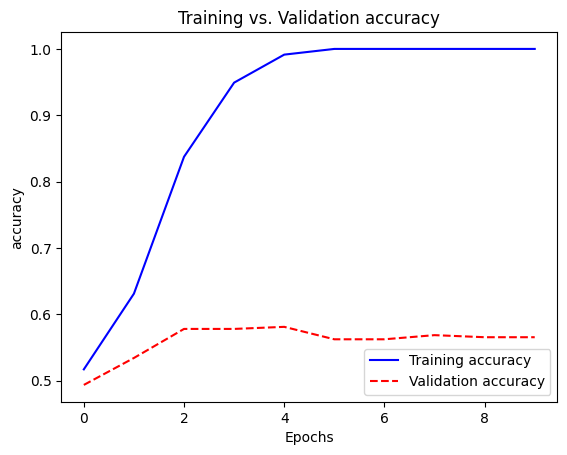

In [49]:
plot_results(history, 'accuracy')

In [50]:
print(f'{score[1]:.3f}')

0.485


In [51]:
y_pred = np.round(model.predict(X_test))
for pred, y_t in zip(y_pred[:10], y_test[:10]):
    print(f'predicted value: {pred[0]}, true value: {y_t}, so the prediction is {pred[0] == y_t}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 708ms/step
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 0.0, true value: 1, so the prediction is False
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
